# Network robustness

In [1]:
import networkx as nx
import seaborn as sns

---
## Simulating random and targeted attacks to a network

Resilience is the ability to provide and maintain an acceptable level of service in the face of faults and challenges to normal operation. Threats and challenges for services can range from simple misconfiguration over large scale natural disasters to targeted attacks.

We define a function that performs a random or targeted attack to a network according to a given strategy (random, degree based, betweenness based, etc. )

In [8]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6])

In [9]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [10]:
from random import shuffle

In [14]:
lista = [1, 2, 3, 4, 5, 6]
shuffle(lista)
ranked_nodes = lista
ranked_nodes

[2, 3, 4, 5, 6, 1]

In [15]:
def net_attack(graph, ranked_nodes):

    # here we store the tuples: (%removed nodes, size of gcc)
    fraction_removed = []

    graph1 = graph.copy()
    nnodes = len(ranked_nodes)
    n = 0

    gcc = list(nx.connected_components(graph1))[0]

    gcc_size = float(len(gcc)) / nnodes

    fraction_removed.append((float(n) / nnodes, gcc_size))

    while gcc_size > 0.01:

        # we start from the end of the list!
        graph1.remove_node(ranked_nodes.pop())

        gcc = list(nx.connected_components(graph1))[0]
        gcc_size = float(len(gcc)) / nnodes
        n += 1
        fraction_removed.append((float(n) / nnodes, gcc_size))

    return fraction_removed

In [4]:
lista = [1, 2, 3, 4]

In [5]:
lista.pop()

4

## Robustness of the US airport network
### Random attack

In [16]:
filepath_air = "./../datasets/USairport_2010.txt"

In [17]:
G = nx.Graph()
fh = open(filepath_air, "r")
for line in fh.readlines():
    s = line.strip().split()
    G.add_edge(int(s[0]), int(s[1]))
fh.close()

In [22]:
airport_nodes = list(G.nodes())

In [20]:
print(G)

Graph with 405 nodes and 8251 edges


In [ ]:
shuffle(lista)


In [23]:
resilience_random = net_attack(G, airport_nodes)

In [24]:
resilience_random

[(0.0, 0.9950617283950617),
 (0.0024691358024691358, 0.9925925925925926),
 (0.0049382716049382715, 0.9901234567901235),
 (0.007407407407407408, 0.9876543209876543),
 (0.009876543209876543, 0.9876543209876543),
 (0.012345679012345678, 0.9876543209876543),
 (0.014814814814814815, 0.9851851851851852),
 (0.01728395061728395, 0.9827160493827161),
 (0.019753086419753086, 0.980246913580247),
 (0.022222222222222223, 0.9777777777777777),
 (0.024691358024691357, 0.9753086419753086),
 (0.027160493827160494, 0.9728395061728395),
 (0.02962962962962963, 0.9703703703703703),
 (0.03209876543209877, 0.9679012345679012),
 (0.0345679012345679, 0.9654320987654321),
 (0.037037037037037035, 0.9629629629629629),
 (0.03950617283950617, 0.9604938271604938),
 (0.04197530864197531, 0.9580246913580247),
 (0.044444444444444446, 0.9555555555555556),
 (0.04691358024691358, 0.9530864197530864),
 (0.04938271604938271, 0.9506172839506173),
 (0.05185185185185185, 0.9481481481481482),
 (0.05432098765432099, 0.94567901234

In [29]:
import matplotlib.pyplot as plt
import numpy as np

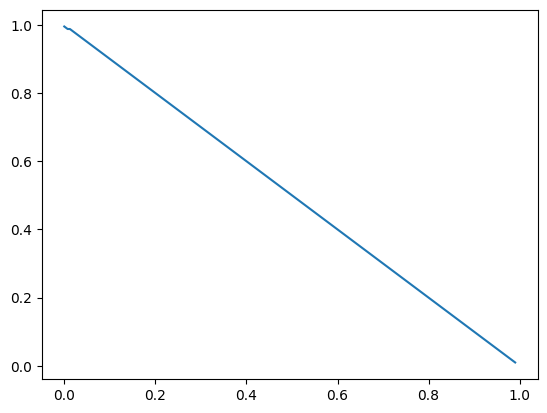

In [32]:
fig, ax = plt.subplots()

data = np.array(resilience_random)

ax.plot(data[:, 0], data[:, 1])

### Betweenness based attack

In [33]:
from operator import itemgetter

In [35]:
airport_nodes_betw = []

betw = nx.betweenness_centrality(G)
for i in sorted(betw.items(), key=itemgetter(1)):
    airport_nodes_betw.append(i[0])

In [39]:
betw[389]

0.132272652064009

In [40]:
resilience_betw = net_attack(G, airport_nodes_betw)

Text(0.5, 0, 'Fraction of nodes removed')

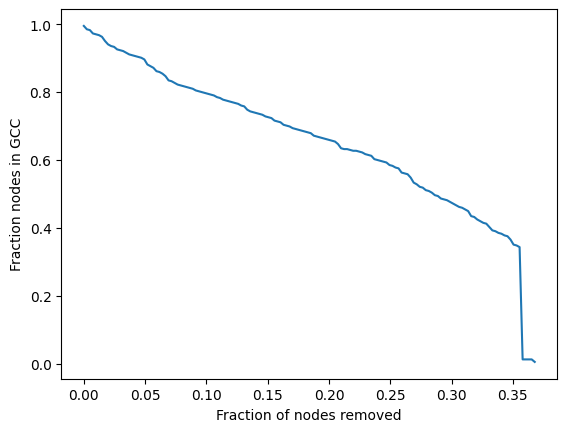

In [42]:
fig, ax = plt.subplots()

data = np.array(resilience_betw)

ax.plot(data[:, 0], data[:, 1])

ax.set_ylabel("Fraction nodes in GCC")
ax.set_xlabel("Fraction of nodes removed")

### Degree based attack

In [43]:
airport_nodes_degree = []

deg = dict(G.degree())
for i in sorted(deg.items(), key=itemgetter(1)):
    airport_nodes_degree.append(i[0])


resilience_deg = net_attack(G, list(airport_nodes_degree))

Let's compare the results.

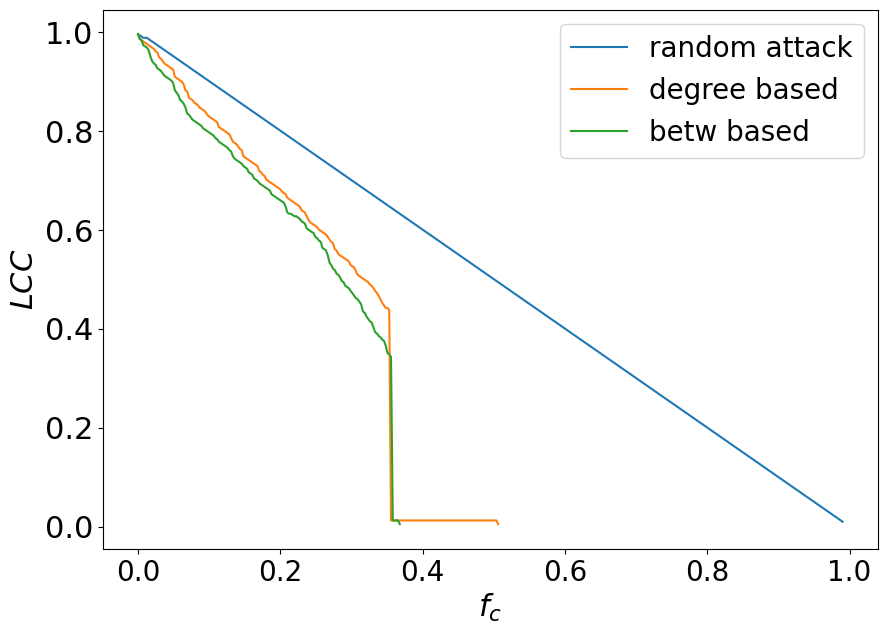

In [44]:
x = [k[0] for k in resilience_random]
y = [k[1] for k in resilience_random]

x1 = [k[0] for k in resilience_deg]
y1 = [k[1] for k in resilience_deg]

x2 = [k[0] for k in resilience_betw]
y2 = [k[1] for k in resilience_betw]

plt.figure(figsize=(10, 7))

plt.plot(x, y, label="random attack")
plt.plot(x1, y1, label="degree based")
plt.plot(x2, y2, label="betw based")

plt.xlabel("$f_{c}$", fontsize=22)
plt.ylabel("$LCC$", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)

plt.legend(loc="upper right", fontsize=20)

Real networks such as the air transport network are vulnerable to targeted attacks.

## Robustness of the Erdos-Renyi random network

In [45]:
ER = nx.fast_gnp_random_graph(2000, 0.012)
ER_nodes = list(ER.nodes())

In [46]:
# we rank the nodes by degree
ER_nodes_deg = [i for i, d in sorted(dict(ER.degree()).items(), key=itemgetter(1))]

In [47]:
ER_betw = nx.betweenness_centrality(ER)

In [48]:
ER_nodes_betw = [i for i, b in sorted(dict(ER_betw).items(), key=itemgetter(1))]

In [49]:
resilience_random = net_attack(ER, ER_nodes)
resilience_deg = net_attack(ER, ER_nodes_deg)
resilience_betw = net_attack(ER, ER_nodes_betw)

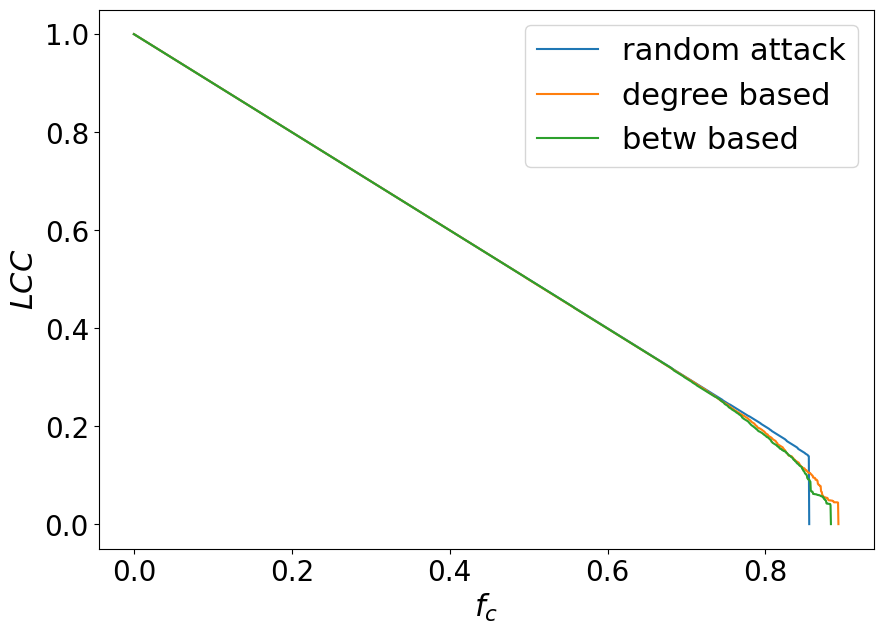

In [50]:
x = [k[0] for k in resilience_random]
y = [k[1] for k in resilience_random]

x1 = [k[0] for k in resilience_deg]
y1 = [k[1] for k in resilience_deg]

x2 = [k[0] for k in resilience_betw]
y2 = [k[1] for k in resilience_betw]

plt.figure(figsize=(10, 7))

plt.plot(x, y, label="random attack")
plt.plot(x1, y1, label="degree based")
plt.plot(x2, y2, label="betw based")

plt.xlabel("$f_{c}$", fontsize=22)
plt.ylabel("$LCC$", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc="upper right", fontsize=22)

Random networks such as the E-R network are not vulnerable to targeted attacks.

##  Robustness of Barabasi-Albert network

In [51]:
BA = nx.barabasi_albert_graph(2000, 3)
BA_nodes = list(BA.nodes())

In [52]:
# we rank the nodes by degree
BA_nodes_deg = [i for i, d in sorted(dict(BA.degree()).items(), key=itemgetter(1))]

In [53]:
BA_betw = nx.betweenness_centrality(BA)

In [54]:
BA_nodes_betw = [i for i, b in sorted(dict(BA_betw).items(), key=itemgetter(1))]

In [55]:
resilience_random = net_attack(BA, BA_nodes)
resilience_deg = net_attack(BA, BA_nodes_deg)
resilience_betw = net_attack(BA, BA_nodes_betw)

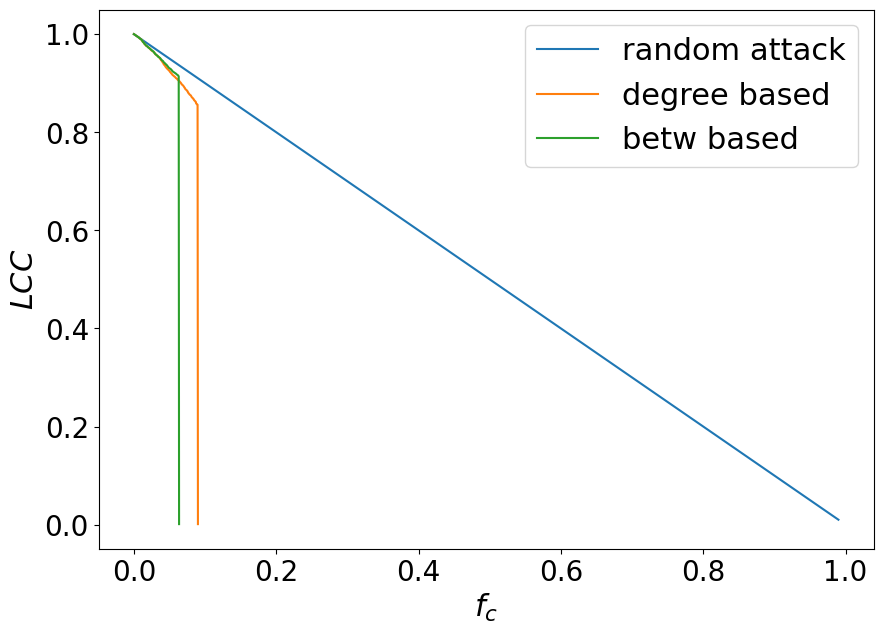

In [56]:
x = [k[0] for k in resilience_random]
y = [k[1] for k in resilience_random]

x1 = [k[0] for k in resilience_deg]
y1 = [k[1] for k in resilience_deg]

x2 = [k[0] for k in resilience_betw]
y2 = [k[1] for k in resilience_betw]

plt.figure(figsize=(10, 7))

plt.plot(x, y, label="random attack")
plt.plot(x1, y1, label="degree based")
plt.plot(x2, y2, label="betw based")

plt.xlabel("$f_{c}$", fontsize=22)
plt.ylabel("$LCC$", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc="upper right", fontsize=22)

In [57]:
from scipy.stats import zipf

a = 2.5
seq = zipf.rvs(a, loc=1, size=10000)
if np.sum(seq) % 2 != 0:
    seq[0] = seq[0] + 1

gs = nx.configuration_model(seq[:2000])
# we rank the nodes by degree
gs_nodes = list(gs.nodes())
gs_nodes_deg = [i for i, d in sorted(dict(gs.degree()).items(), key=itemgetter(1))]
gs_betw = nx.betweenness_centrality(gs)
gs_nodes_betw = [i for i, b in sorted(dict(gs_betw).items(), key=itemgetter(1))]

NetworkXError: Invalid degree sequence: sum of degrees must be even, not odd

In [ ]:
resilience_random = net_attack(gs, gs_nodes)
resilience_deg = net_attack(gs, gs_nodes_deg)
resilience_betw = net_attack(gs, gs_nodes_betw)

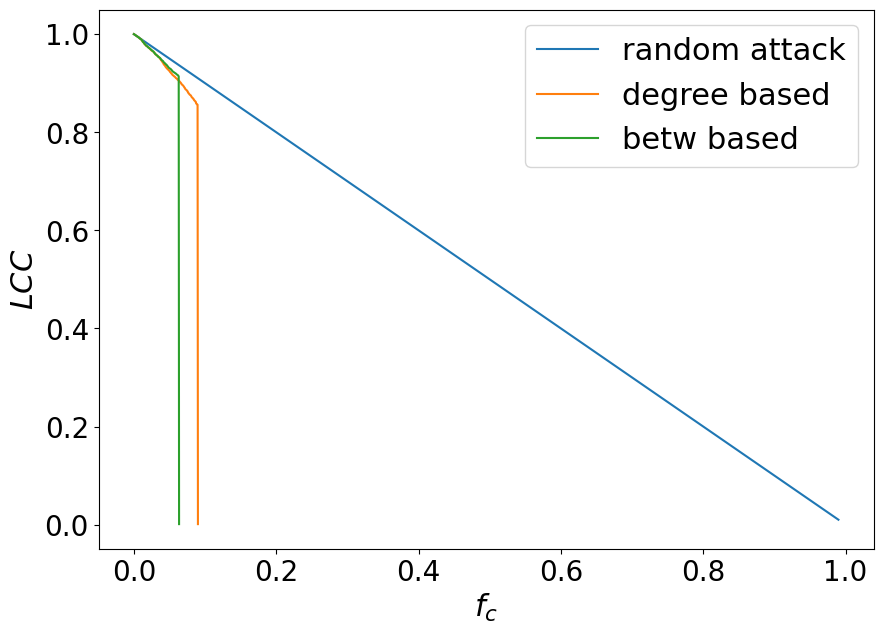

In [58]:
x = [k[0] for k in resilience_random]
y = [k[1] for k in resilience_random]

x1 = [k[0] for k in resilience_deg]
y1 = [k[1] for k in resilience_deg]

x2 = [k[0] for k in resilience_betw]
y2 = [k[1] for k in resilience_betw]

plt.figure(figsize=(10, 7))

plt.plot(x, y, label="random attack")
plt.plot(x1, y1, label="degree based")
plt.plot(x2, y2, label="betw based")

plt.xlabel("$f_{c}$", fontsize=22)
plt.ylabel("$LCC$", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc="upper right", fontsize=22)

## Homework: why? 